# Sephora Product

In [77]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [78]:
# Load Dataset
df = pd.read_csv('product_info.csv')
display(df)

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,NaN,NaN,NaN,...,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,85.0,30.0
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,3253,4.2500,16.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
3,P473660,Kasbah Eau de Parfum,6342,19-69,3018,4.4762,21.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
4,P473658,Purple Haze Eau de Parfum,6342,19-69,2691,3.2308,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8489,P467659,Couture Clutch Eyeshadow Palette,1070,Yves Saint Laurent,2790,4.4286,7.0,NaN,NaN,NaN,...,0,0,0,NaN,Makeup,Eye,Eye Palettes,0,NaN,NaN
8490,P500874,L'Homme Eau de Parfum,1070,Yves Saint Laurent,2319,4.6367,556.0,2 oz / 60 mL,Size + Concentration + Formulation,2 oz / 60 mL eau de parfum spray,...,0,0,0,"['Layerable Scent', 'Woody & Earthy Scent']",Fragrance,Men,Cologne,1,129.0,129.0
8491,P504428,Mon Paris Eau de Parfum Gift Set,1070,Yves Saint Laurent,1475,5.0000,2.0,NaN,NaN,NaN,...,1,1,0,NaN,Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
8492,P504448,Y Eau de Parfum Gift Set,1070,Yves Saint Laurent,840,NaN,NaN,NaN,NaN,NaN,...,1,0,0,NaN,Fragrance,Value & Gift Sets,Cologne Gift Sets,0,NaN,NaN


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8494 entries, 0 to 8493
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          8494 non-null   object 
 1   product_name        8494 non-null   object 
 2   brand_id            8494 non-null   int64  
 3   brand_name          8494 non-null   object 
 4   loves_count         8494 non-null   int64  
 5   rating              8216 non-null   float64
 6   reviews             8216 non-null   float64
 7   size                6863 non-null   object 
 8   variation_type      7050 non-null   object 
 9   variation_value     6896 non-null   object 
 10  variation_desc      1250 non-null   object 
 11  ingredients         7549 non-null   object 
 12  price_usd           8494 non-null   float64
 13  value_price_usd     451 non-null    float64
 14  sale_price_usd      270 non-null    float64
 15  limited_edition     8494 non-null   int64  
 16  new   

In [80]:
df.describe()

,brand_id,loves_count,rating,reviews,price_usd,value_price_usd,sale_price_usd,limited_edition,new,online_only,out_of_stock,sephora_exclusive,child_count,child_max_price,child_min_price
count,8494.000000,8.494000e+03,8216.000000,8216.000000,8494.000000,451.000000,270.000000,8494.000000,8494.000000,8494.000000,8494.000000,8494.000000,8494.000000,2754.000000,2754.000000
mean,5422.440546,2.917957e+04,4.194513,448.545521,51.655595,91.168537,20.207889,0.070285,0.071698,0.219096,0.073699,0.279374,1.631622,53.792023,39.665802
std,1709.595957,6.609212e+04,0.516694,1101.982529,53.669234,79.195631,24.327352,0.255642,0.258002,0.413658,0.261296,0.448718,5.379470,58.765894,38.685720
min,1063.000000,0.000000e+00,1.000000,1.000000,3.000000,0.000000,1.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000
25%,5333.000000,3.758000e+03,3.981725,26.000000,25.000000,45.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,19.000000
50%,6157.500000,9.880000e+03,4.289350,122.000000,35.000000,67.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000,28.000000
75%,6328.000000,2.684125e+04,4.530525,418.000000,58.000000,108.500000,25.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,59.000000,42.000000
max,8020.000000,1.401068e+06,5.000000,21281.000000,1900.000000,617.000000,320.000000,1.000000,1.000000,1.000000,1.000000,1.000000,105.000000,570.000000,400.000000


## Pre-Processing

In [81]:
# Data Cleaning
# pilih kolom yang relevan untuk Data Tabular
selected_columns = ['brand_name', 'loves_count', 'rating', 'reviews', 'price_usd', 'primary_category']
df = df[selected_columns]

# Hapus baris yang memiliki nilai kosong (NaN)
df = df.dropna()

# Filter: ambil kategori yang jumlah datanya cukup banyak saja (Top 10)
# Agar model tidak bingung dengan kategori yang isinya hanya sedikit
top_categories = df['primary_category'].value_counts().nlargest(10).index
df = df[df['primary_category'].isin(top_categories)]

print(f"Jumlah Data Bersih: {len(df)} baris")
print(f"Kategori yang diprediksi: {list(top_categories)}")

Jumlah Data Bersih: 8216 baris
Kategori yang diprediksi: ['Skincare', 'Makeup', 'Hair', 'Fragrance', 'Bath & Body', 'Mini Size', 'Men', 'Tools & Brushes', 'Gifts']


/tmp/ipython-input-4050130632.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='primary_category', order=df['primary_category'].value_counts().index, palette='viridis')


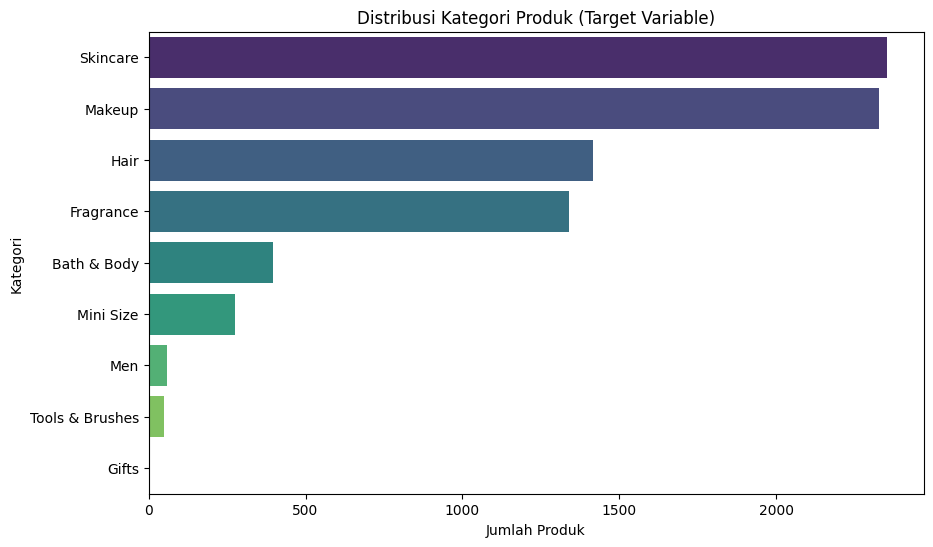

In [82]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='primary_category', order=df['primary_category'].value_counts().index, palette='viridis')
plt.title('Distribusi Kategori Produk (Target Variable)')
plt.xlabel('Jumlah Produk')
plt.ylabel('Kategori')
plt.show()

In [83]:
# Encoding (Mengubah Huruf ke Angka)
# Label Encoding untuk kolom Brand (Fitur)
le_brand = LabelEncoder()
df['brand_name_encoded'] = le_brand.fit_transform(df['brand_name'])

# Label Encoding untuk kolom Target (Category)
le_target = LabelEncoder()
df['target_encoded'] = le_target.fit_transform(df['primary_category'])

In [84]:
# Split Data (Fitur X dan Target y)
# X menggunakan fitur numerik + brand yg sudah di-encode
X = df[['brand_name_encoded', 'loves_count', 'rating', 'reviews', 'price_usd']].values
y = df['target_encoded'].values

# Ubah target y menjadi One-Hot Encoding (format yang diminta Neural Network untuk klasifikasi banyak kelas)
y = to_categorical(y)

# Bagi menjadi Train (80%) dan Test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [85]:
# Scaling (Standarisasi Angka)
# untuk Neural Network agar angka besar (harga) tidak mendominasi angka kecil (rating)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Preprocessing Selesai. Siap masuk ke Model.")

Preprocessing Selesai. Siap masuk ke Model.


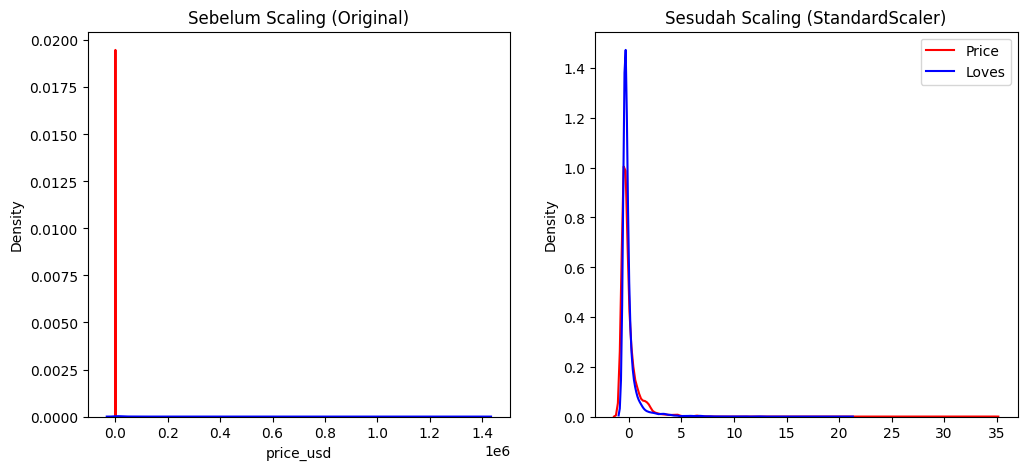

In [86]:
# Perbandingan distribusi sebelum dan sesudah scaling
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.set_title('Sebelum Scaling (Original)')
sns.kdeplot(df['price_usd'], ax=ax1, color='red')
sns.kdeplot(df['loves_count'], ax=ax1, color='blue')

# Asumsi X_train_scaled adalah hasil StandardScaler
ax2.set_title('Sesudah Scaling (StandardScaler)')
sns.kdeplot(X_train[:, 4], ax=ax2, color='red', label='Price') # indeks disesuaikan
sns.kdeplot(X_train[:, 1], ax=ax2, color='blue', label='Loves')
plt.legend()
plt.show()

## Neural Network base (non-pretrained) - MLP

In [87]:
# MODEL MLP

# Inisialisasi Model
model_base = Sequential()

# Input Layer & Hidden Layer 1
model_base.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))

# Hidden Layer 2
model_base.add(Dense(32, activation='relu'))
model_base.add(Dropout(0.2))

# Hidden Layer 3
model_base.add(Dense(16, activation='relu'))

# Output Layer
model_base.add(Dense(y.shape[1], activation='softmax'))

# Compile Model
model_base.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training Model
history_base = model_base.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=300,
    batch_size=32,
    verbose=1
)

# Evaluasi Hasil
loss, accuracy = model_base.evaluate(X_test, y_test)
print(f"\nAkurasi Base Model (MLP): {accuracy*100:.2f}%")

Epoch 1/300


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


206/206 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2255 - loss: 1.9611 - val_accuracy: 0.3887 - val_loss: 1.5475
Epoch 2/300
206/206 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3765 - loss: 1.5729 - val_accuracy: 0.3844 - val_loss: 1.4758
Epoch 3/300
206/206 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3961 - loss: 1.5008 - val_accuracy: 0.4118 - val_loss: 1.4587
Epoch 4/300
206/206 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4117 - loss: 1.4726 - val_accuracy: 0.4246 - val_loss: 1.4460
Epoch 5/300
206/206 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4018 - loss: 1.4640 - val_accuracy: 0.3990 - val_loss: 1.4473
Epoch 6/300
206/206 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4021 - loss: 1.4754 - val_accuracy: 0.4240 - val_loss: 1.4293
Epoch 7/300
206/206 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4327 - loss: 1.4414 - val_accuracy: 0.4300 - val_loss: 1.4210
Epoch 8/300
206/206 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4227 - loss: 1.4512 - val_accuracy: 0.4221

In [92]:
# Classification Report (accuracy, precision, recall, dan F1-score.)

# Prediksi data test
y_pred_probs = model_base.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Konversi y_test dari one-hot encoding kembali ke label integer
y_test_labels = np.argmax(y_test, axis=1)

# Classification Report
print("Classification Report Model 1 - MLP:\n")
print(classification_report(y_test_labels, y_pred, target_names=le_target.classes_))

52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Classification Report Model 1:

                 precision    recall  f1-score   support

    Bath & Body       0.00      0.00      0.00        74
      Fragrance       0.57      0.55      0.56       283
          Gifts       0.00      0.00      0.00         2
           Hair       0.42      0.50      0.46       285
         Makeup       0.54      0.68      0.60       466
            Men       0.27      0.38      0.32         8
      Mini Size       0.25      0.02      0.04        53
       Skincare       0.47      0.43      0.45       464
Tools & Brushes       0.00      0.00      0.00         9

       accuracy                           0.50      1644
      macro avg       0.28      0.28      0.27      1644
   weighted avg       0.47      0.50      0.48      1644



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


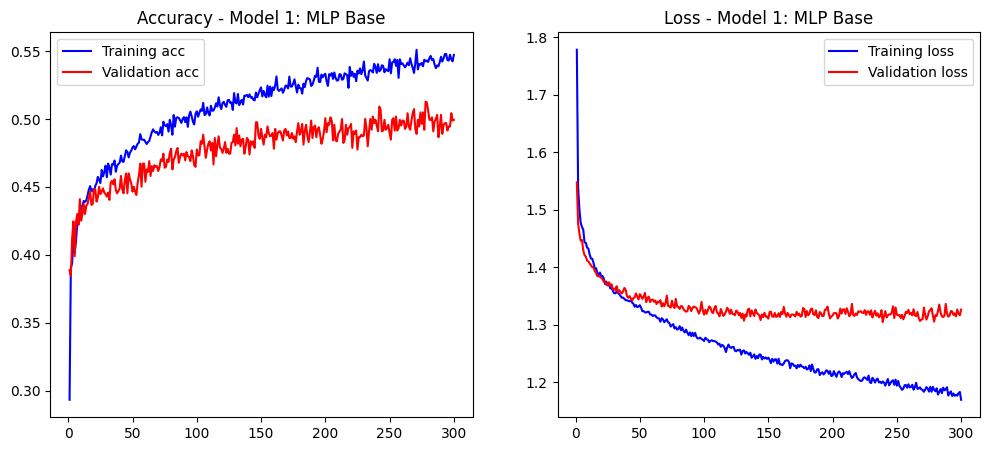

In [93]:
# Grafik Loss dan Accuracy

def plot_history(history, title):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))

    # Plot Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Training acc')
    plt.plot(epochs, val_acc, 'r', label='Validation acc')
    plt.title(f'Accuracy - {title}')
    plt.legend()

    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title(f'Loss - {title}')
    plt.legend()
    plt.show()

# Panggil fungsi
plot_history(history_base, "Model 1 - MLP Base")

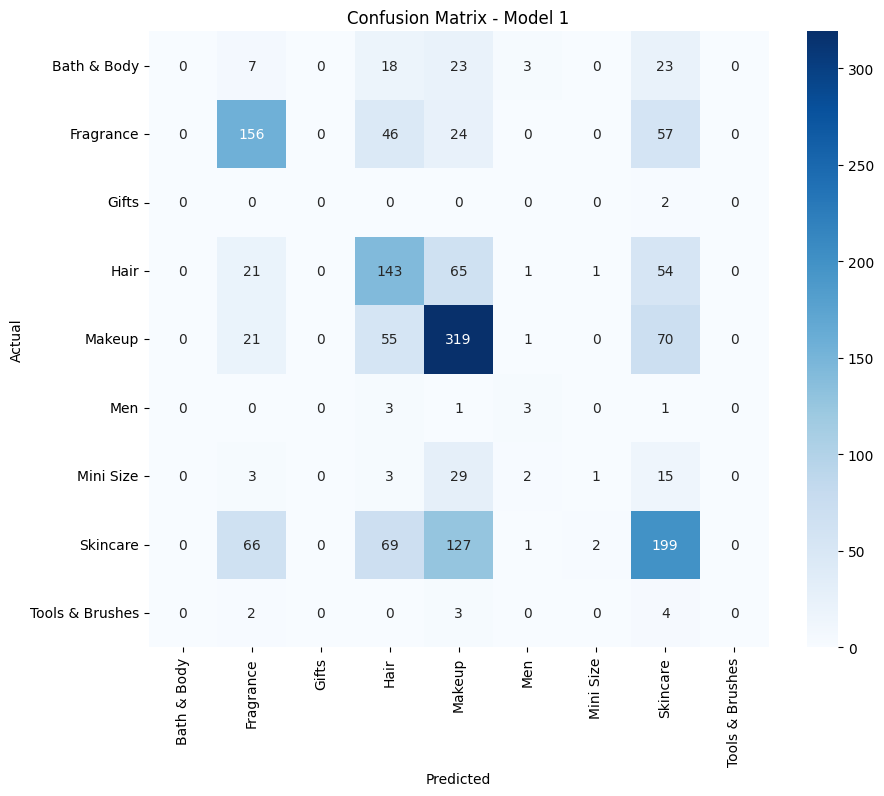

In [95]:
# Confusion Matrix

# Ensure y_test is in integer label format for confusion_matrix
cm = confusion_matrix(y_test_labels, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le_target.classes_, yticklabels=le_target.classes_, cmap='Blues')
plt.title('Confusion Matrix Model 1 - MLP')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Model Pretrained 1 - TabNet

In [96]:
!pip install pytorch-tabnet

In [97]:
import pandas as pd
import numpy as np
import torch
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [98]:
# PREPROCESSING TABNET
# ulangi load data agar bersih dan khusus format TabNet
df = pd.read_csv('product_info.csv')

# Pilih kolom
selected_columns = ['brand_name', 'loves_count', 'rating', 'reviews', 'price_usd', 'primary_category']
df = df[selected_columns].dropna()

# Ambil Top 10 Kategori saja (biar seimbang dengan Model 1)
top_categories = df['primary_category'].value_counts().nlargest(10).index
df = df[df['primary_category'].isin(top_categories)]

# Pisahkan Fitur dan Target
target = 'primary_category'
# Pastikan 'brand_name' ada di urutan awal agar mudah dilacak indeksnya
features = ['brand_name', 'loves_count', 'rating', 'reviews', 'price_usd']

# Encoding Target
le_target = LabelEncoder()
df[target] = le_target.fit_transform(df[target])

# Encoding Kolom Kategorikal (Brand) & Simpan Info untuk TabNet
cat_idxs = []
cat_dims = []

for i, col in enumerate(features):
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        cat_idxs.append(i)
        cat_dims.append(len(le.classes_))

# Split Data
X = df[features].values
y = df[target].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [99]:
# MODEL TABNET

# Inisialisasi Model TabNet
clf = TabNetClassifier(
    n_d=16, n_a=16,
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=2e-2),
    scheduler_params={"step_size":10, "gamma":0.9},
    scheduler_fn=torch.optim.lr_scheduler.StepLR,
    mask_type='entmax',
    verbose=1
)

# Fitting Model
clf.fit(
    X_train=X_train, y_train=y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    eval_name=['train', 'valid'],
    eval_metric=['accuracy'],
    max_epochs=200,
    patience=10,
    batch_size=256,
    virtual_batch_size=128,
    num_workers=0,
    drop_last=False
)

/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 1.72082 | train_accuracy: 0.22839 | valid_accuracy: 0.23236 |  0:00:01s
epoch 1  | loss: 1.48523 | train_accuracy: 0.30539 | valid_accuracy: 0.309   |  0:00:03s
epoch 2  | loss: 1.44773 | train_accuracy: 0.38436 | valid_accuracy: 0.3826  |  0:00:04s
epoch 3  | loss: 1.43007 | train_accuracy: 0.3661  | valid_accuracy: 0.37287 |  0:00:05s
epoch 4  | loss: 1.42274 | train_accuracy: 0.38953 | valid_accuracy: 0.39355 |  0:00:07s
epoch 5  | loss: 1.41321 | train_accuracy: 0.39699 | valid_accuracy: 0.39416 |  0:00:08s
epoch 6  | loss: 1.40893 | train_accuracy: 0.41099 | valid_accuracy: 0.40328 |  0:00:09s
epoch 7  | loss: 1.39972 | train_accuracy: 0.41753 | valid_accuracy: 0.41667 |  0:00:10s
epoch 8  | loss: 1.39494 | train_accuracy: 0.43427 | valid_accuracy: 0.41849 |  0:00:10s
epoch 9  | loss: 1.38114 | train_accuracy: 0.43077 | valid_accuracy: 0.42944 |  0:00:11s
epoch 10 | loss: 1.37465 | train_accuracy: 0.45587 | valid_accuracy: 0.43491 |  0:00:12s
epoch 11 | loss: 1.38

/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [100]:
# EVALUASI
preds = clf.predict(X_test)
acc = accuracy_score(y_test, preds)

print(f"Akurasi Model TabNet: {acc*100:.2f}%")

# Fitur Tambahan: Melihat Feature Importance (Kelebihan TabNet)
# Ini memberitahu kolom mana yang paling berpengaruh dalam menentukan kategori
feat_importances = clf.feature_importances_
print("\nTingkat Kepentingan Fitur:")
for name, imp in zip(features, feat_importances):
    print(f"{name}: {imp:.4f}")

Akurasi Model TabNet: 50.97%

Tingkat Kepentingan Fitur:
brand_name: 0.1945
loves_count: 0.1587
rating: 0.1325
reviews: 0.1230
price_usd: 0.3914


In [102]:
# Classification Report (accuracy, precision, recall, dan F1-score.)

preds = clf.predict(X_test)
print("Classification Report TabNet:\n")
print(classification_report(y_test, preds, target_names=le_target.classes_))

Classification Report TabNet:

                 precision    recall  f1-score   support

    Bath & Body       0.50      0.01      0.03        74
      Fragrance       0.64      0.48      0.55       283
          Gifts       0.00      0.00      0.00         2
           Hair       0.42      0.47      0.44       285
         Makeup       0.53      0.70      0.60       466
            Men       0.00      0.00      0.00         8
      Mini Size       0.25      0.02      0.04        53
       Skincare       0.48      0.52      0.50       464
Tools & Brushes       0.00      0.00      0.00         9

       accuracy                           0.51      1644
      macro avg       0.31      0.24      0.24      1644
   weighted avg       0.50      0.51      0.49      1644



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


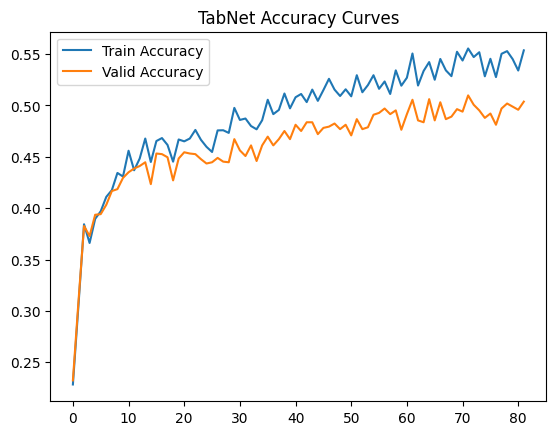

In [105]:
# Grafik Accuracy

plt.plot(clf.history['train_accuracy'], label='Train Accuracy')
plt.plot(clf.history['valid_accuracy'], label='Valid Accuracy')
plt.title("TabNet Accuracy Curves")
plt.legend()
plt.show()

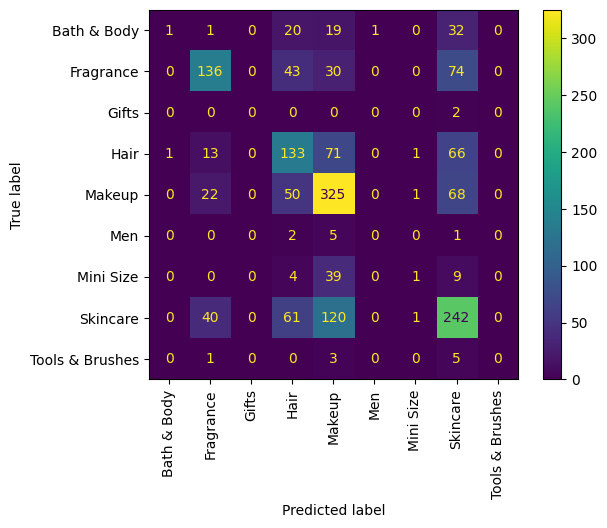

In [109]:
# Confusion Matrix

ConfusionMatrixDisplay.from_predictions(y_test, preds, display_labels=le_target.classes_, xticks_rotation='vertical')
plt.title('Confusion Matrix TabNet')
plt.show()

## Model Pretrained 2 -  Pretrained Embedding

In [110]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, Flatten, Concatenate, Dense, Dropout
from tensorflow.keras.models import Model

In [111]:
# Definisikan Input
# Input untuk Brand (Kategorikal)
input_brand = Input(shape=(1,), name='brand_input')
# Input untuk Numerik (price, rating, loves, reviews)
input_numeric = Input(shape=(4,), name='numeric_input')

# RE-PREPROCESSING FOR EMBEDDING MODEL
df_temp = pd.read_csv('product_info.csv')
selected_columns_temp = ['brand_name', 'loves_count', 'rating', 'reviews', 'price_usd', 'primary_category']
df_temp = df_temp[selected_columns_temp].dropna()
top_categories_temp = df_temp['primary_category'].value_counts().nlargest(10).index
df_temp = df_temp[df_temp['primary_category'].isin(top_categories_temp)]

# Label Encoding for Brand
le_brand_temp = LabelEncoder()
df_temp['brand_name_encoded'] = le_brand_temp.fit_transform(df_temp['brand_name'])

# Label Encoding for Target
le_target_temp = LabelEncoder()
df_temp['target_encoded'] = le_target_temp.fit_transform(df_temp['primary_category'])

# Split Data (Fitur X dan Target y)
X_reprocessed = df_temp[['brand_name_encoded', 'loves_count', 'rating', 'reviews', 'price_usd']].values
y_reprocessed = df_temp['target_encoded'].values

# Ubah target y menjadi One-Hot Encoding
y_reprocessed_one_hot = to_categorical(y_reprocessed)

# Bagi menjadi Train (80%) dan Test (20%)
X_train_reprocessed, X_test_reprocessed, y_train_reprocessed, y_test_reprocessed = train_test_split(
    X_reprocessed, y_reprocessed_one_hot, test_size=0.2, random_state=42
)

# Separate brand feature from numeric features
X_train_brand = X_train_reprocessed[:, 0]
X_train_num = X_train_reprocessed[:, 1:]

X_test_brand = X_test_reprocessed[:, 0]
X_test_num = X_test_reprocessed[:, 1:]

# Scaling numeric features
scaler_numeric = StandardScaler()
X_train_num_scaled = scaler_numeric.fit_transform(X_train_num)
X_test_num_scaled = scaler_numeric.transform(X_test_num)

In [112]:
# Embedding Layer (Pretrained-like approach)
num_brands = len(le_brand_temp.classes_)
embedding_size = 10
brand_emb = Embedding(input_dim=num_brands, output_dim=embedding_size)(input_brand)
brand_emb = Flatten()(brand_emb)

# Concatenate (Gabungkan Embedding dengan Data Numerik)
concat = Concatenate()([brand_emb, input_numeric])

# Dense Layers (Neural Network)
fc1 = Dense(64, activation='relu')(concat)
fc2 = Dense(32, activation='relu')(fc1)
output = Dense(y_train_reprocessed.shape[1], activation='softmax')(fc2)

# Build Model
model_emb = Model(inputs=[input_brand, input_numeric], outputs=output)
model_emb.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train (X_train_brand dan X_train_num harus dipisah dulu)
history_emb = model_emb.fit(
    [X_train_brand, X_train_num_scaled], y_train_reprocessed,
    validation_data=([X_test_brand, X_test_num_scaled], y_test_reprocessed),
    epochs=50, batch_size=32, verbose=1
)

Epoch 1/50
206/206 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3107 - loss: 1.8675 - val_accuracy: 0.7354 - val_loss: 1.0675
Epoch 2/50
206/206 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7776 - loss: 0.8722 - val_accuracy: 0.8266 - val_loss: 0.6150
Epoch 3/50
206/206 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8287 - loss: 0.5718 - val_accuracy: 0.8327 - val_loss: 0.5846
Epoch 4/50
206/206 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8413 - loss: 0.5277 - val_accuracy: 0.8339 - val_loss: 0.5560
Epoch 5/50
206/206 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8419 - loss: 0.4971 - val_accuracy: 0.8297 - val_loss: 0.5459
Epoch 6/50
206/206 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8298 - loss: 0.5053 - val_accuracy: 0.8315 - val_loss: 0.5378
Epoch 7/50
206/206 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8415 - loss: 0.4763 - val_accuracy: 0.8388 - val_loss: 0.5242
Epoch 8/50
206/206 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8498 - loss: 0.4494 - val_accuracy: 0.

In [113]:
# Karena model memiliki 2 input, kita harus memberikannya dalam bentuk list: [Brand, Numeric]
y_pred_probs = model_emb.predict([X_test_brand, X_test_num_scaled])

# Mengubah probabilitas menjadi label kelas (ambil nilai tertinggi)
y_pred = np.argmax(y_pred_probs, axis=1)

# Mengubah y_test dari One-Hot Encoding kembali ke label integer
y_true = np.argmax(y_test_reprocessed, axis=1)

# Ambil nama kelas untuk label visualisasi
class_names = le_target_temp.classes_

52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [118]:
# Classification Report (accuracy, precision, recall, dan F1-score.)

print("Classification Report - MODEL 3 (EMBEDDING)")
print(classification_report(y_true, y_pred, target_names=class_names))

Classification Report - MODEL 3 (EMBEDDING)
                 precision    recall  f1-score   support

    Bath & Body       0.46      0.31      0.37        74
      Fragrance       0.90      0.95      0.92       283
          Gifts       0.00      0.00      0.00         2
           Hair       0.95      0.91      0.93       285
         Makeup       0.82      0.89      0.86       466
            Men       0.35      0.88      0.50         8
      Mini Size       0.29      0.23      0.26        53
       Skincare       0.84      0.81      0.82       464
Tools & Brushes       0.00      0.00      0.00         9

       accuracy                           0.83      1644
      macro avg       0.51      0.55      0.52      1644
   weighted avg       0.82      0.83      0.82      1644



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


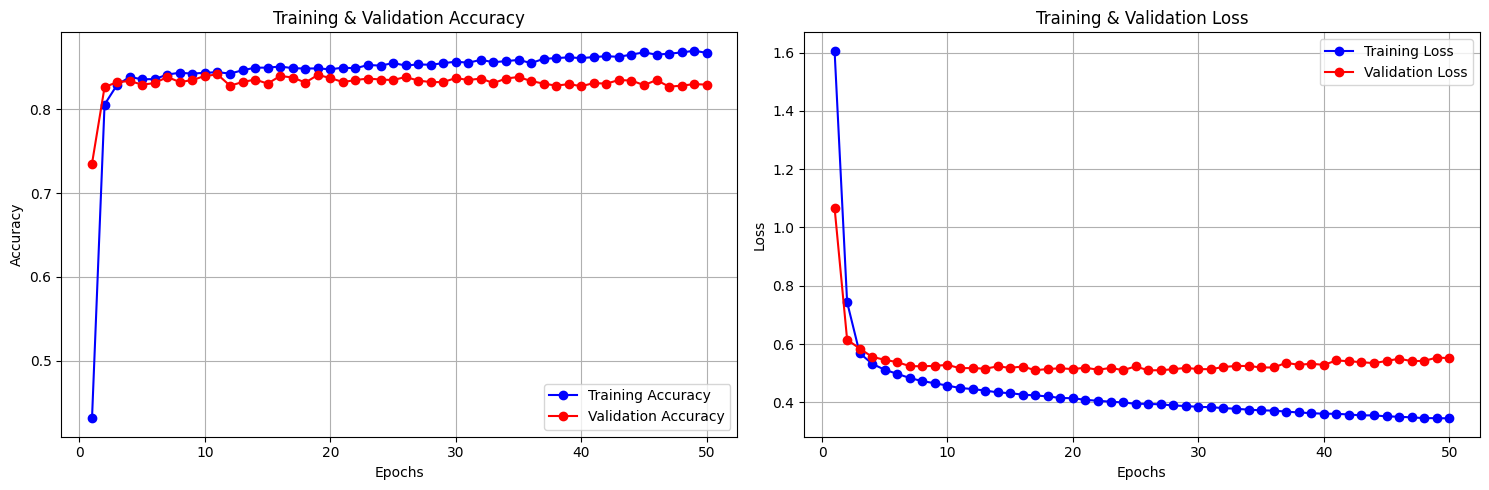

In [119]:
# Grafik Loss dan Accuracy

def plot_history(history_obj):
    acc = history_obj.history['accuracy']
    val_acc = history_obj.history['val_accuracy']
    loss = history_obj.history['loss']
    val_loss = history_obj.history['val_loss']
    epochs = range(1, len(acc) + 1)

    # Inisialisasi figure
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # Plot Accuracy
    ax1.plot(epochs, acc, 'b-o', label='Training Accuracy')
    ax1.plot(epochs, val_acc, 'r-o', label='Validation Accuracy')
    ax1.set_title('Training & Validation Accuracy')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy')
    ax1.legend()
    ax1.grid(True)

    # Plot Loss
    ax2.plot(epochs, loss, 'b-o', label='Training Loss')
    ax2.plot(epochs, val_loss, 'r-o', label='Validation Loss')
    ax2.set_title('Training & Validation Loss')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    ax2.legend()
    ax2.grid(True)

    plt.tight_layout()
    plt.show()

# Panggil fungsi grafik
plot_history(history_emb)

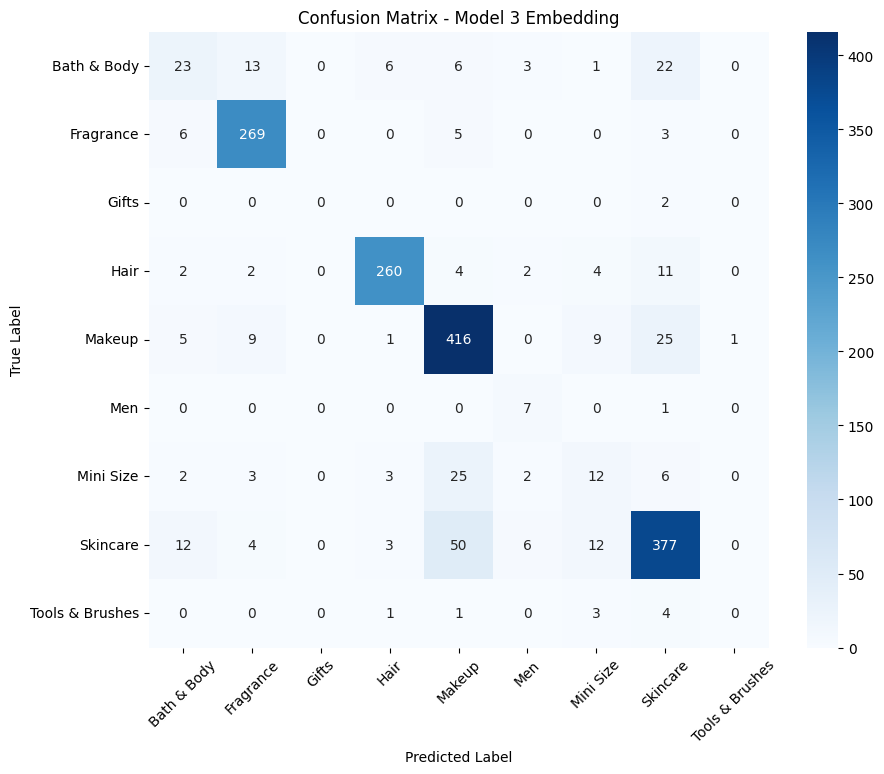

In [120]:
# Confussion Matrix

plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.title('Confusion Matrix - Model 3 Embedding')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(rotation=45)
plt.show()

## Menyimpan Model

In [121]:
import pickle
import os

In [122]:
# MENYIMPAN MODEL 1 (MLP)

# Simpan Model Neural Network (MLP)
model_base.save('model_mlp.h5')
print("✅ Model MLP berhasil disimpan sebagai 'model_mlp.h5'")

# Simpan Scaler dan Encoder yang dipakai MLP
# ini agar data input di Streamlit bisa di-scale sama persis dengan data training
mlp_artifacts = {
    'scaler': scaler,           # Untuk menstandarisasi angka (price, rating, dll)
    'le_brand': le_brand,       # Untuk mengubah nama brand jadi angka
    'le_target': le_target      # Untuk mengembalikan angka prediksi jadi nama kategori
}

with open('mlp_artifacts.pkl', 'wb') as f:
    pickle.dump(mlp_artifacts, f)
print("✅ MLP (Scaler & Encoder) berhasil disimpan sebagai 'mlp_artifacts.pkl'")

✅ Model MLP berhasil disimpan sebagai 'model_mlp.h5'
✅ MLP (Scaler & Encoder) berhasil disimpan sebagai 'mlp_artifacts.pkl'


In [123]:
# MENYIMPAN MODEL 2 (TabNet)

# Simpan Model TabNet
save_path = clf.save_model('model_tabnet')
print(f"✅ Model TabNet berhasil disimpan di '{save_path}'")

tabnet_artifacts = {
    'le_brand_tabnet': le_brand  # encoder brand yang sama (karena datanya sama)
}

with open('tabnet_artifacts.pkl', 'wb') as f:
    pickle.dump(tabnet_artifacts, f)
print("✅ TabNet berhasil disimpan sebagai 'tabnet_artifacts.pkl'")

Successfully saved model at model_tabnet.zip
✅ Model TabNet berhasil disimpan di 'model_tabnet.zip'
✅ TabNet berhasil disimpan sebagai 'tabnet_artifacts.pkl'


In [124]:
# MENYIMPAN MODEL 3 (Embedding)

# Simpan Model Embedding
model_emb.save('model_embedding.h5')
print("✅ Model Embedding berhasil disimpan sebagai 'model_embedding.h5'")

✅ Model Embedding berhasil disimpan sebagai 'model_embedding.h5'
